#### Handwritten digits classification using MNIST dataset

In [35]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

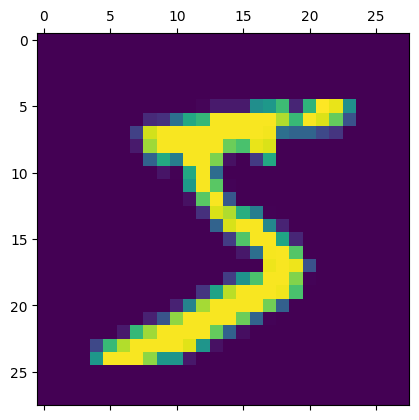

In [10]:
plt.matshow(X_train[0])

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
model = keras.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [27]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs = 5, batch_size = 30)

Epoch 1/5
2000/2000 [==============================] - 18s 9ms/step - loss: 0.0360 - accuracy: 0.9886
Epoch 2/5
2000/2000 [==============================] - 17s 8ms/step - loss: 0.0257 - accuracy: 0.9918
Epoch 3/5
2000/2000 [==============================] - 16s 8ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 4/5
2000/2000 [==============================] - 15s 8ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 5/5
2000/2000 [==============================] - 16s 8ms/step - loss: 0.0114 - accuracy: 0.9963


In [30]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 4ms/step


array([[3.6884856e-11, 2.2037108e-10, 7.8389890e-09, ..., 1.0000000e+00,
        2.0070654e-09, 1.0466803e-08],
       [1.0145354e-08, 2.0594078e-10, 1.0000000e+00, ..., 1.2245897e-12,
        6.1542416e-13, 5.1441653e-15],
       [5.3871492e-08, 9.9944836e-01, 6.0560460e-08, ..., 3.0524796e-05,
        1.1122134e-04, 9.2172667e-07],
       ...,
       [4.3540855e-16, 3.5056166e-14, 9.0742777e-16, ..., 8.1491747e-13,
        1.5387816e-10, 1.1582886e-12],
       [6.3804544e-13, 1.3162931e-15, 1.6708470e-13, ..., 1.9237181e-15,
        2.4104334e-06, 2.1211080e-12],
       [4.8637172e-10, 2.5368451e-12, 2.5319727e-08, ..., 7.3478379e-18,
        5.0284055e-11, 4.3669957e-15]], dtype=float32)

In [32]:
y_pred = y_prob.argmax(axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    3,    0,    0,    1,    0,    2,    1,    0],
       [   0, 1128,    1,    0,    1,    0,    2,    1,    1,    1],
       [   0,    0, 1026,    0,    1,    0,    0,    5,    0,    0],
       [   0,    0,    3, 1006,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  978,    0,    1,    1,    0,    2],
       [   0,    0,    0,    7,    0,  884,    1,    0,    0,    0],
       [   3,    2,    0,    0,    3,    4,  946,    0,    0,    0],
       [   0,    1,    4,    0,    1,    0,    0, 1020,    0,    2],
       [   3,    0,   11,    2,    0,    4,    4,    2,  945,    3],
       [   1,    0,    1,    3,    6,   11,    0,    3,    2,  982]])>

Text(95.72222222222221, 0.5, 'Truth')

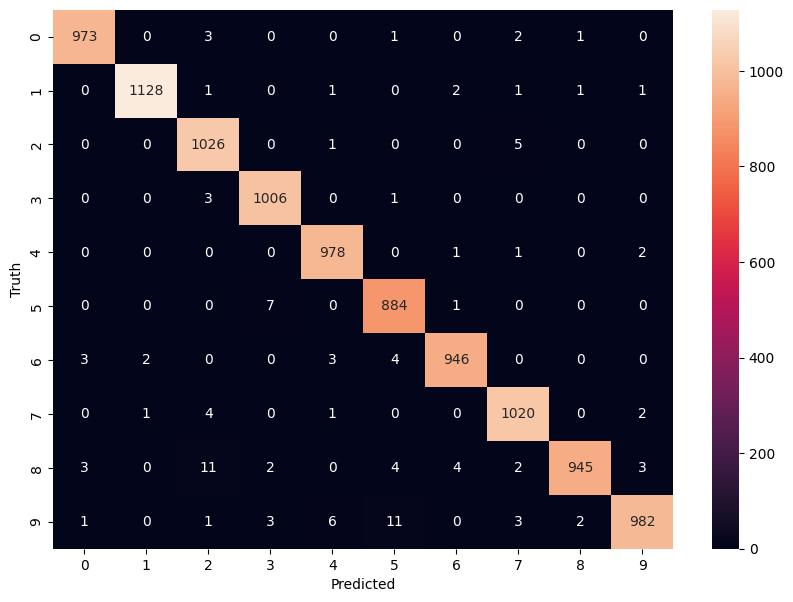

In [34]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')